# Plant Nutrition Predictor
Name: Ferry Marcellus Suhendra

### Introduction

In this notebook a series of 8 measurements from 2 labs are provided to measure a target data which predict certain plant nutrition. The detail of the target data and measurements are undisclosed. From this data a machine learning algorithm was created to predict the target values.

### Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tune_sklearn import TuneGridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

np.random.seed(32)

### Data Loading

In [3]:
# Loading dataframe
df=pd.read_csv('aria_data.csv',sep=";")
df

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,"4,63","260,6",199,"391,3333333","371,7333333","466,8","273,1333333","742,0666667","4047,733333",lab 1
1,5,"263,2","194,6","393,6666667","348,5333333","401,8","220,0666667",712,"4673,466667",lab 1
2,"4,91","247,2666667","205,8","375,4666667","354,8666667",419,"222,1333333","677,2","4386,8",lab 1
3,"4,77","257,9444444","191,8333333","368,7222222","334,6666667","417,2222222","195,9444444","678,5555556","4588,777778",lab 1
4,"4,89","258,2","195,7333333","356,6666667","333,3333333","394,6",196,"677,1333333","4867,066667",lab 1
...,...,...,...,...,...,...,...,...,...,...
155,"4,83","573,25","361,25","643,125","489,8125","666,875","355,25","712,3125","3943,6875",lab 2
156,"4,47","678,375","398,125","678,25","541,125",704,"393,5","788,8125","3928,1875",lab 2
157,"4,63",634,"382,8666667","657,4666667","505,0666667","719,2","366,6","792,1333333","3861,2",lab 2
158,"4,35","615,3125","366,75","642,9375","483,6875","675,625","359,0625","730,125","3859,0625",lab 2


In [4]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   target       160 non-null    object
 1   v1           160 non-null    object
 2   v2           160 non-null    object
 3   v3           160 non-null    object
 4   v4           160 non-null    object
 5   v5           160 non-null    object
 6   v6           160 non-null    object
 7   v7           160 non-null    object
 8   v8           160 non-null    object
 9   sample_type  160 non-null    object
dtypes: object(10)
memory usage: 12.6+ KB


In [5]:
# replacing decimal separator and changing data type
for col in ['target','v1','v2','v3','v4','v5','v6','v7','v8']:
    df[col]=df[col].str.replace(',','.')
    df[col]=df[col].astype(dtype=float)

# encoding sample_type
df['sample_type']=df['sample_type'].str.replace('lab ','')
df['sample_type']=df['sample_type'].astype(dtype=int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    int32  
dtypes: float64(9), int32(1)
memory usage: 12.0 KB


There are a total of 9 possible features for this modeling. 8 of which was undislosed. there are no missing values for any data.

### Exploratory Data Analysis

To understand the relationship of the target and features, we will first plot the scatter distribution of the data to see if there is any visible pattern.

<AxesSubplot:xlabel='v1', ylabel='target'>

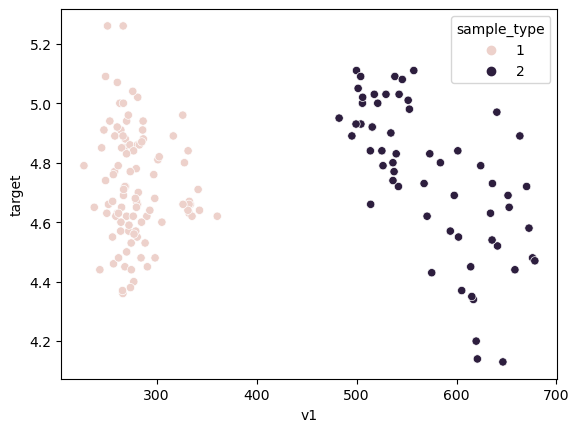

In [6]:
sns.scatterplot(y='target', x='v1', data= df, hue='sample_type')

Sample from Lab 1 and lab 2 seems to have different value range of v1 but does not seem to affect target result much

<AxesSubplot:xlabel='v2', ylabel='target'>

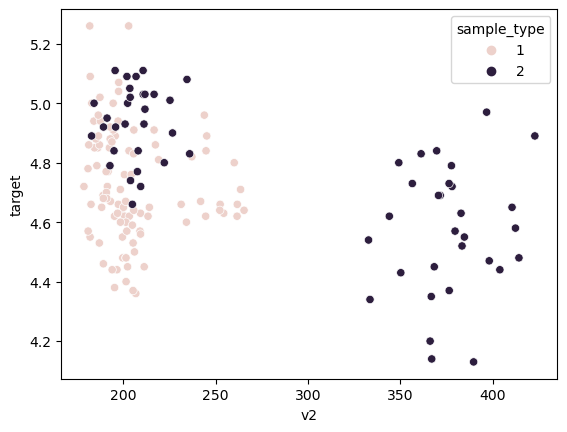

In [7]:
sns.scatterplot(y='target', x='v2', data= df, hue='sample_type')

v2 show similar clustering to v1, but some samples from lab 2 are mixed with sample cluster of v1.

<AxesSubplot:xlabel='v3', ylabel='target'>

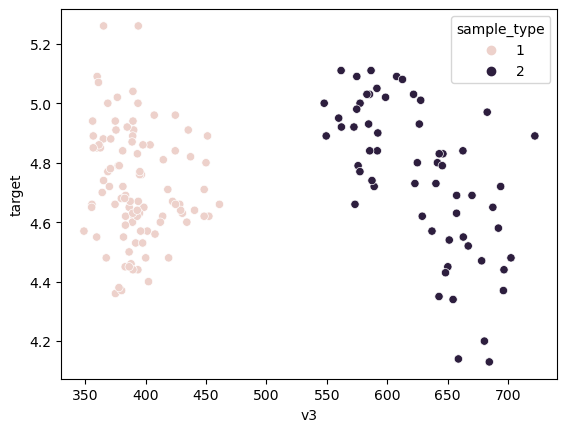

In [8]:
sns.scatterplot(y='target', x='v3', data= df, hue='sample_type')

scatter plot of v3 is similar to v1

<AxesSubplot:xlabel='v4', ylabel='target'>

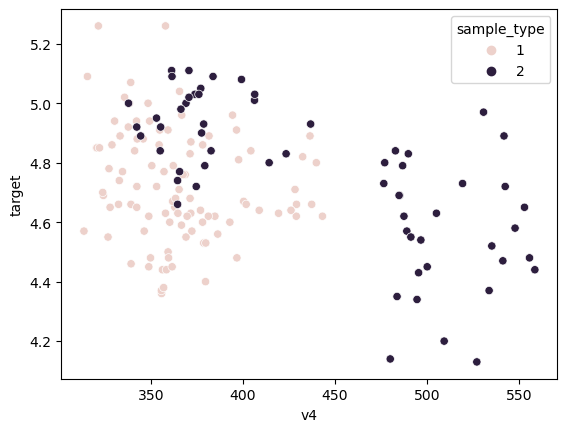

In [9]:
sns.scatterplot(y='target', x='v4', data= df, hue='sample_type')

scatter plot of v4 have similar pattern to v2

<AxesSubplot:xlabel='v5', ylabel='target'>

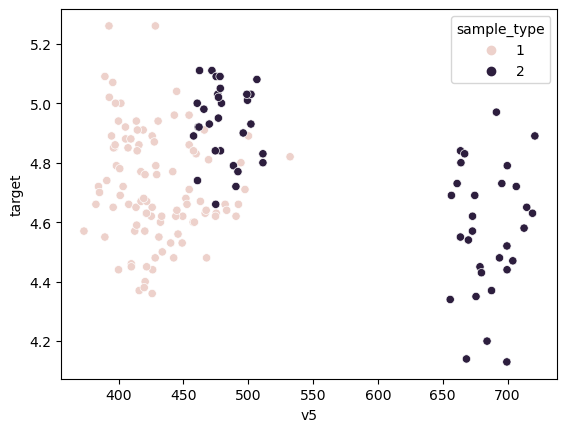

In [10]:
sns.scatterplot(y='target', x='v5', data= df, hue='sample_type')

scatter plot of v5 have similar pattern to v2 and v4

<AxesSubplot:xlabel='v6', ylabel='target'>

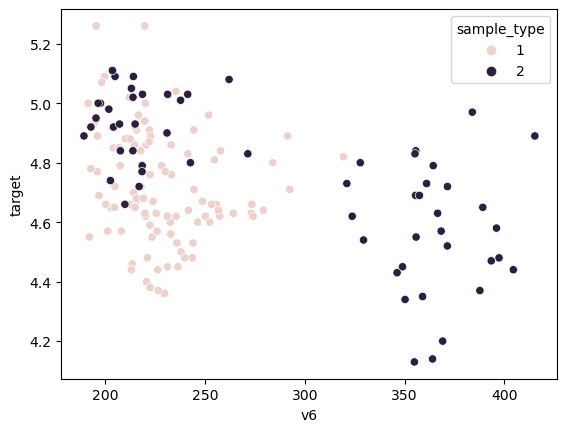

In [11]:
sns.scatterplot(y='target', x='v6', data= df, hue='sample_type')

scatter plot of v6 have similar pattern to v2, v4, and v5

<AxesSubplot:xlabel='v7', ylabel='target'>

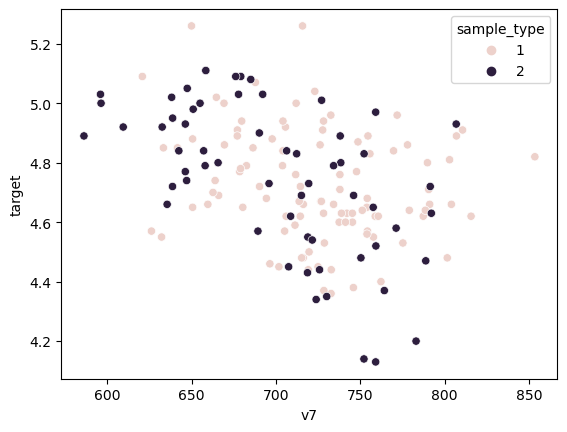

In [12]:
sns.scatterplot(y='target', x='v7', data= df, hue='sample_type')

v7 distribution have no differentiating pattern between lab 1 and lab 2 samples.

<AxesSubplot:xlabel='v8', ylabel='target'>

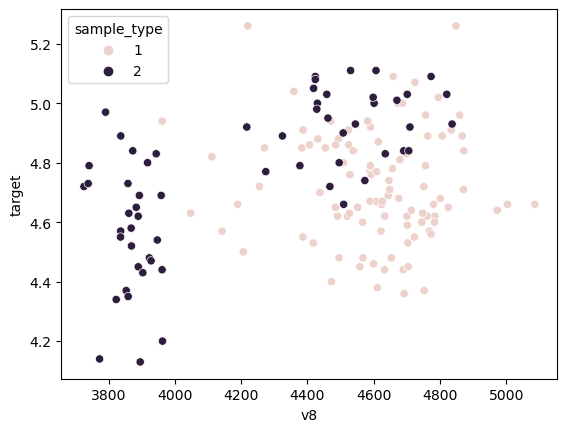

In [13]:
sns.scatterplot(y='target', x='v8', data= df, hue='sample_type')

scatter plot of v8 have similar pattern to v2, v4, v5, and v6

In [14]:
# Checking correlation
df.corr().nlargest(10,'target')['target']

target         1.000000
v8             0.257602
sample_type    0.071090
v3            -0.054569
v1            -0.054944
v5            -0.291639
v4            -0.352085
v2            -0.361506
v7            -0.388306
v6            -0.406801
Name: target, dtype: float64

v2, v4, v5, v6, v7, and ,v8 have strong correlation with target.

<AxesSubplot:>

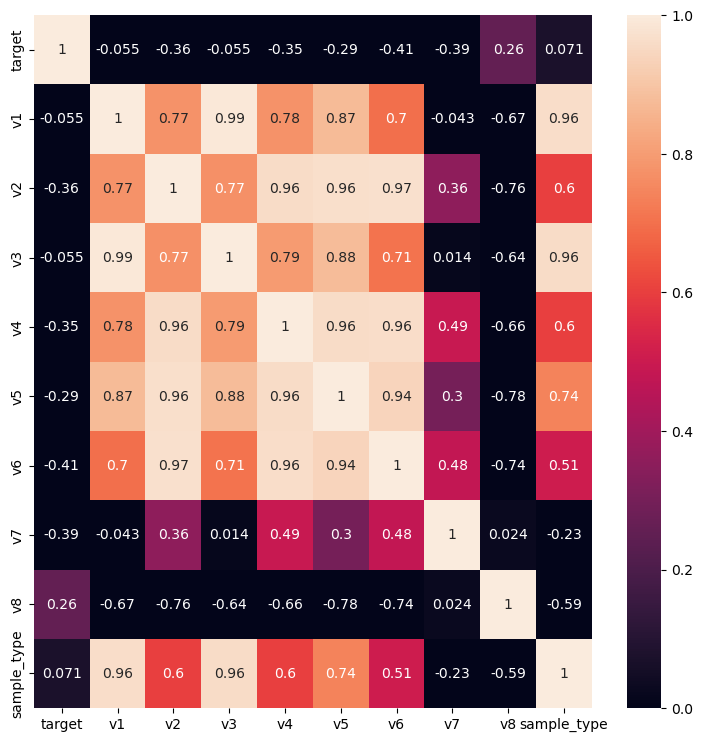

In [15]:
# Plotting correlation heatmap
plt.figure(figsize=(9, 9)) # Figure size.
sns.heatmap(df.corr(), vmin = 0, vmax = 1, annot = True)

A lot of features have correlation with each other. This will hinder the performance of some machine learning algorithm such as linear regression and SVM.

### Data Preprocessing

In [16]:
# Splitting Train and Test Data
x= df.drop('target',axis=1)
y=df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=32)

In [17]:
# defining plot function
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1], whis=3)
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

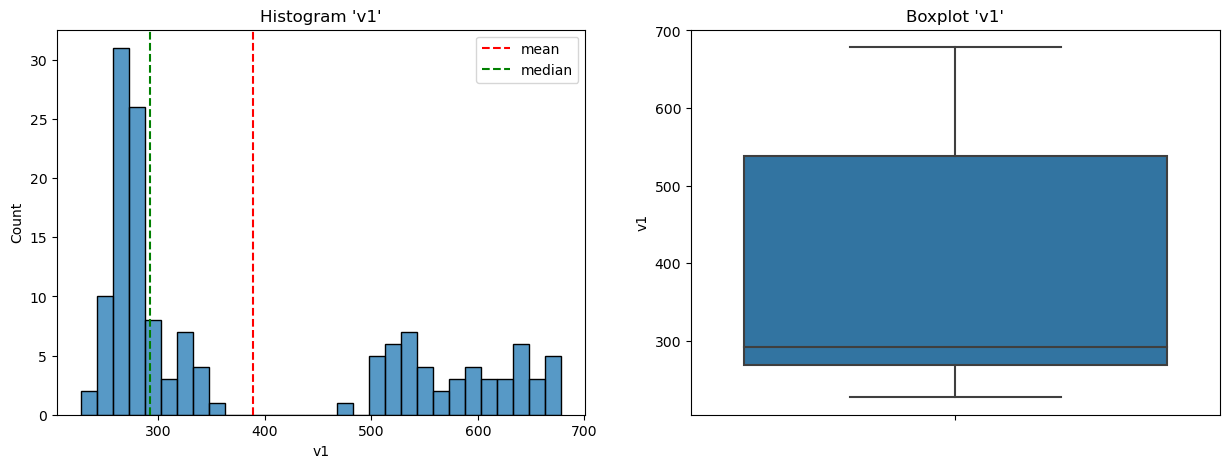

v1 Kurtosis: -1.2639189261944637
v1 Skewness: 0.6874231367945886
Columns 'v1' right skewed


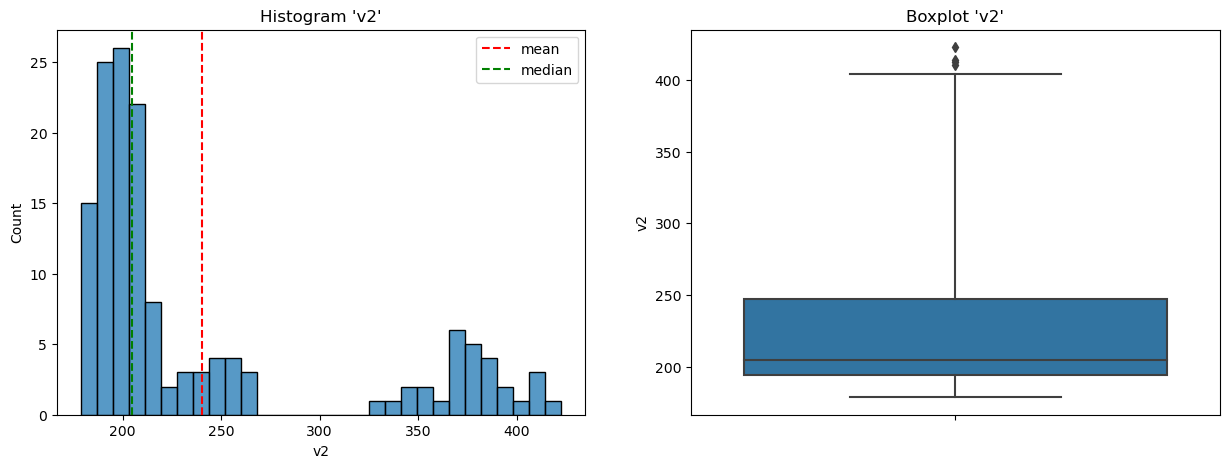

v2 Kurtosis: 0.2701279475435676
v2 Skewness: 1.3701959348069568
Columns 'v2' right skewed


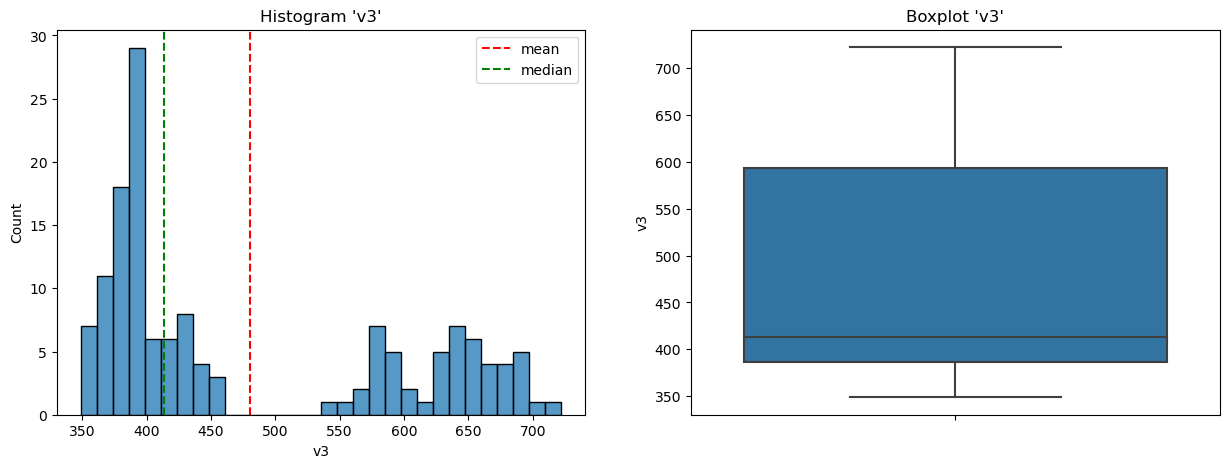

v3 Kurtosis: -1.2906537688874589
v3 Skewness: 0.6550584857096209
Columns 'v3' right skewed


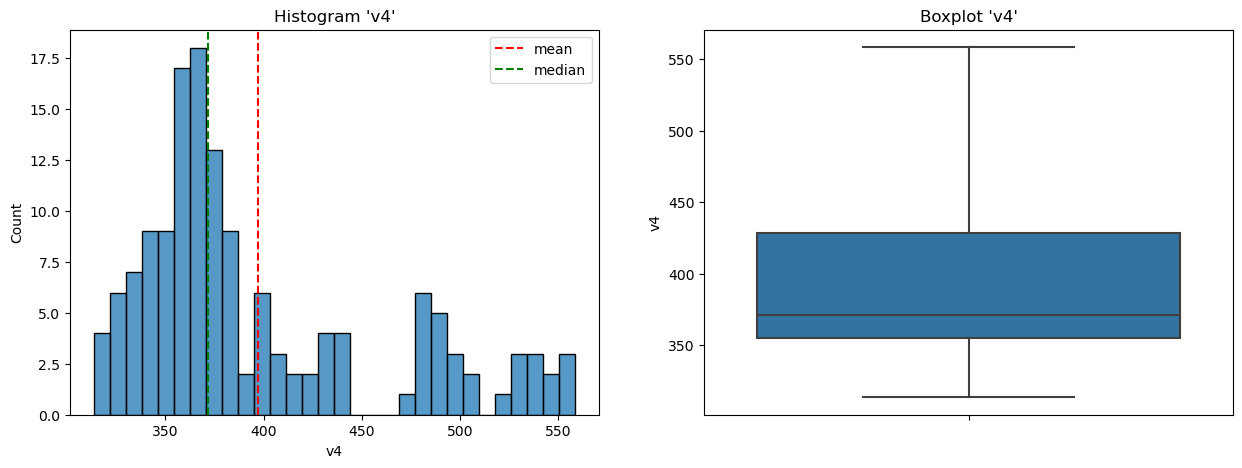

v4 Kurtosis: 0.03545051486547557
v4 Skewness: 1.085355177825065
Columns 'v4' right skewed


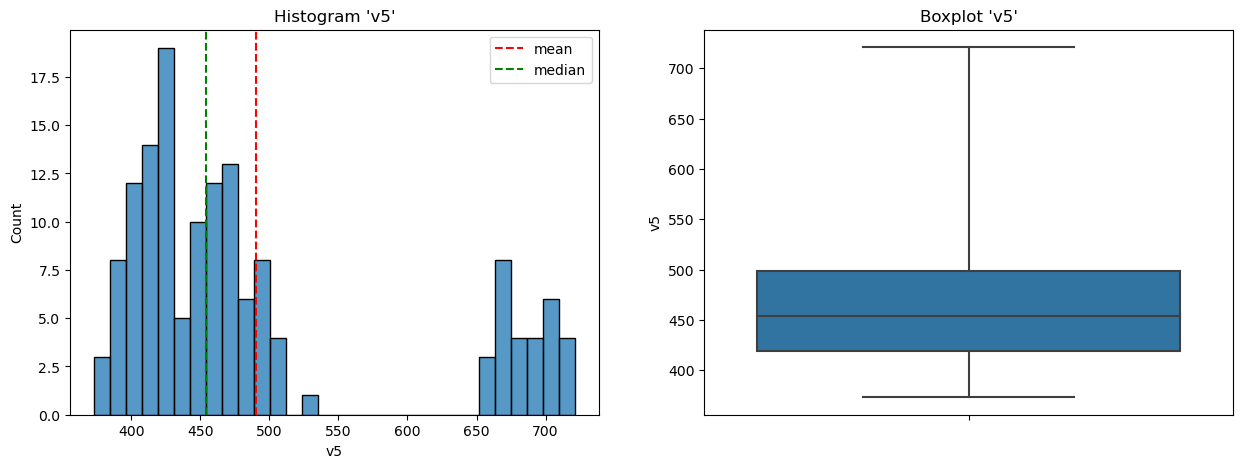

v5 Kurtosis: -0.06509547028033502
v5 Skewness: 1.202139353093355
Columns 'v5' right skewed


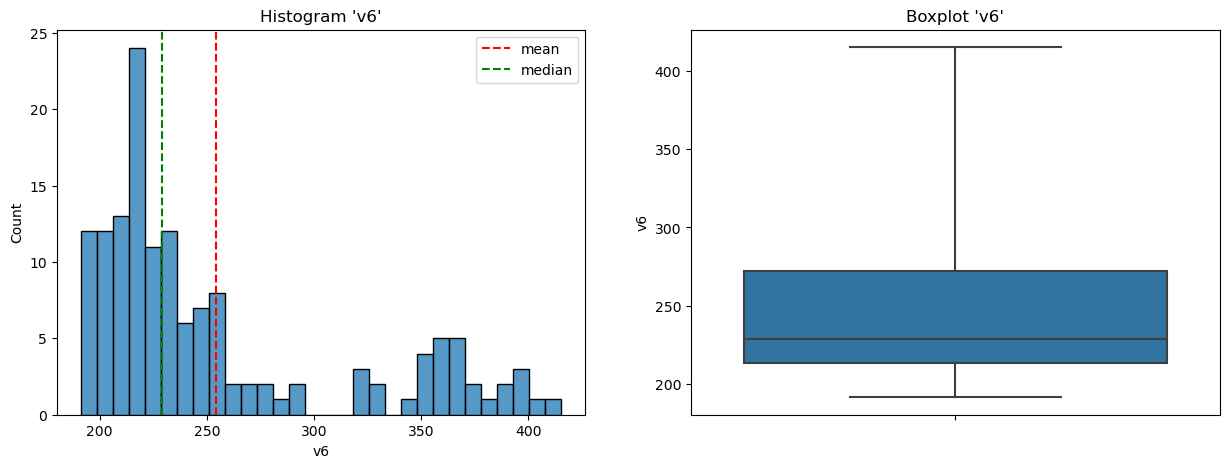

v6 Kurtosis: 0.09571859933060134
v6 Skewness: 1.211044027721327
Columns 'v6' right skewed


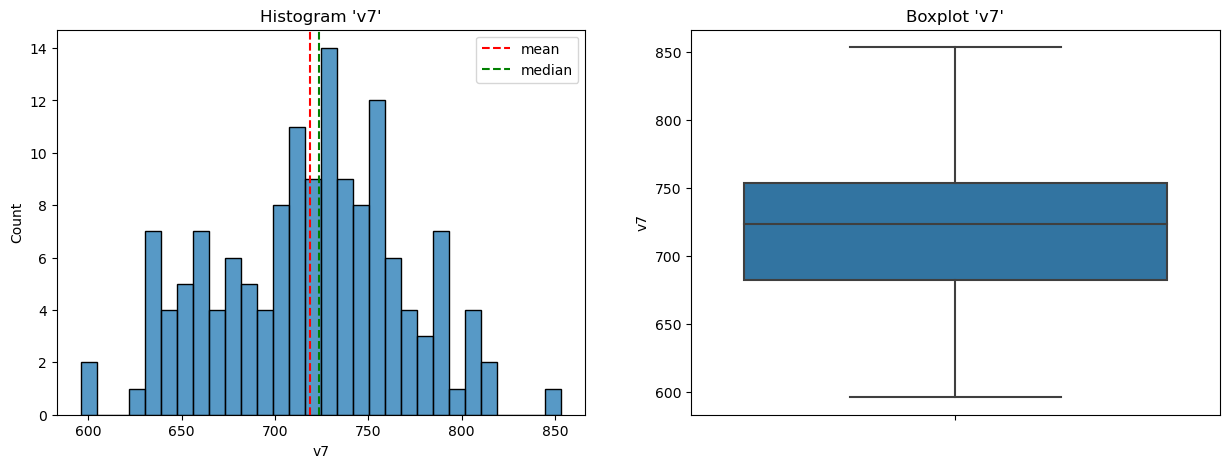

v7 Kurtosis: -0.3394108821173947
v7 Skewness: -0.1222800744653293
Columns 'v7' normal distribution


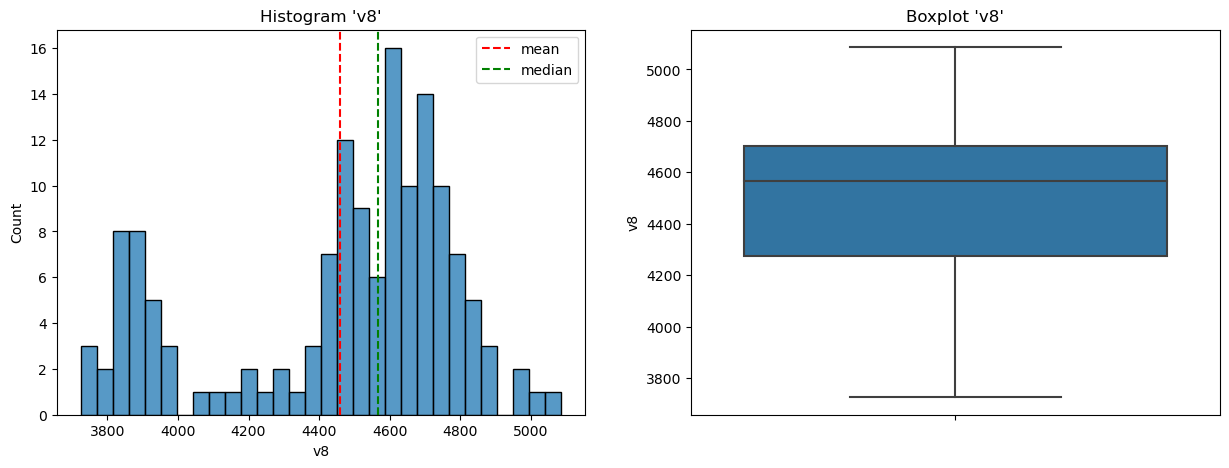

v8 Kurtosis: -0.5586128315624177
v8 Skewness: -0.7775118612865997
Columns 'v8' left skewed


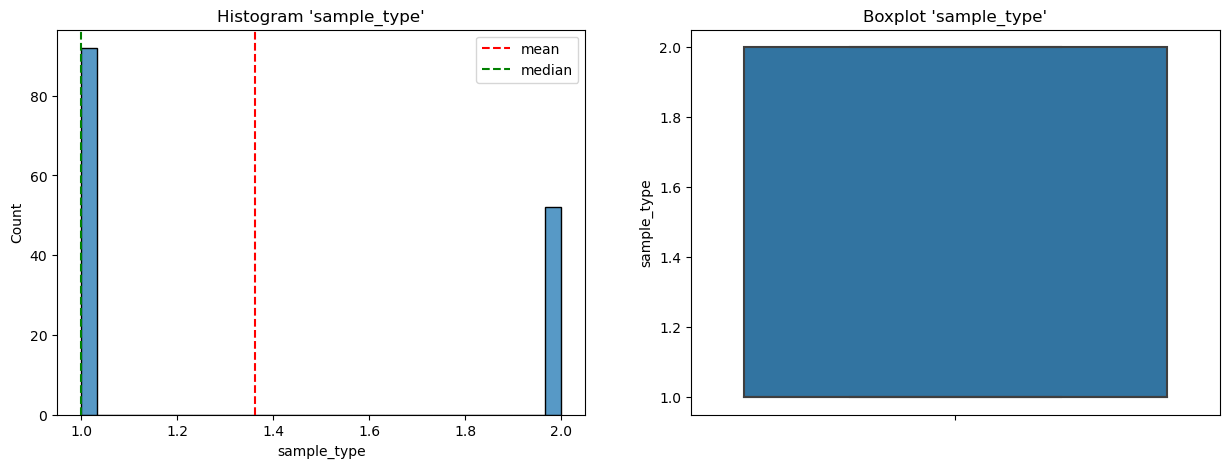

sample_type Kurtosis: -1.6820106578415919
sample_type Skewness: 0.5844203449082741
Columns 'sample_type' right skewed


In [18]:
# Plotting distribution
for col in x_train.columns:
    plot_dist(x_train,col)

most data are skewed and thare are outliers in v2. To handle this, the data will be scaled using robust scaler

In [19]:
# Scaling the data
scaler= RobustScaler()
x_train_s= scaler.fit_transform(x_train)
x_test_s= scaler.transform(x_test)
x_train_s= pd.DataFrame(x_train_s)
x_test_s= pd.DataFrame(x_test_s)

### Model Training

Due to multicolinearity of the data, some algorithm will have performance problem. For this modeling, a tree based model will be used because multicolinearity does not impact its performance as much as other regression algorithms. Random Forest, an ensemble learning model using Decision Tree algorithm will be tuned using TuneGridSearchCV method to find its best parameter for this modeling. the best parameter will then be used as the final model.

In [20]:
# Finding best parameters
param_grid = {'criterion' : ['squared_error', 'absolute_error','friedman_mse','poisson'], 'n_estimators': [100,300,500], 'max_depth': [2,4,6,8,10], 'max_features' : ['sqrt', 'log2'], 'min_samples_leaf' : [1,2,4],'min_samples_split' : [2,4,6] }

cv = TuneGridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid,scoring="neg_root_mean_squared_error",n_jobs=-1)

cv.fit(x_train_s, y_train)

print(cv.best_params_)

{'criterion': 'absolute_error', 'n_estimators': 100, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4}


In [27]:
# defining model with best parameters
model_rf=RandomForestRegressor(criterion = 'absolute_error', n_estimators=100, max_depth = 4, max_features = 'log2', min_samples_leaf=2,min_samples_split=4)

In [28]:
# Training model
model_rf.fit(x_train_s, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=4,
                      max_features='log2', min_samples_leaf=2,
                      min_samples_split=4)

### Model Evaluation

In [29]:
# Creating prediction data
y_pred_train = model_rf.predict(x_train_s)
y_pred_test = model_rf.predict(x_test_s)

In [31]:
print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

MAE train =  0.11574861111111072
MAE test =  0.12103749999999958
MSE train =  0.021909243020833264
MSE test =  0.023708564999999848
RMSE train =  0.14801771184839085
RMSE test =  0.15397585849736264


RMSE of the train and test show that there are on average, a deviation of 0.15 between the prediction result and actual target. given the scale of the data, this may seem a decent ammount of accuracy, but more context on the target data is required to fully understand wether the model can be implemented or not. looking at the evaluation bebtween the test and train data also show that the model just fits.

In [30]:
# Joining actual and predicted label
y_plot= pd.concat([pd.DataFrame(y_train.reset_index(drop=True)),pd.DataFrame(y_pred_train)],axis=1)

(0.0, 6.0)

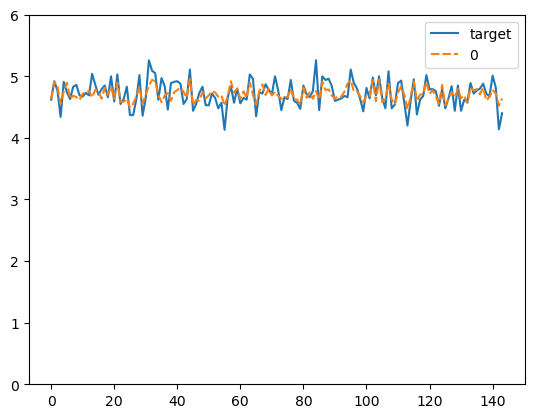

In [35]:
# Plotting labels
plt.subplot()
sns.lineplot(data=y_plot)
plt.ylim(0,6)

visualization of the actual label and prediction result show that large deviation exist in target values that are higher or lower, with the model creating a conservative prediction closer to the average for those measurements.

### Conclusion

A model predicting target can be created with relative accuracy, although more context is required to understand the permissible error from the actual label.
Within the dataset, it is found that different samples from the 2 labs show different measurement values. This may be due to difference in sample types, treatment of samples, measurement technique or simply a difference in environmental factor. Understanding the reason of the difference may be able to help in improving the prediction model.
The features presented for the modeling shows strong multicolinearity with each other. Due to this, Random Forest algorithm is chosen as the model to predict target because it is not affected much by multicolinearity.

Further improvements to the model can be done by:
1. Understanding the context of the data.
2. Increasing the size of the training data.
3. Doing further feature engineering which requires context of the data.